In [34]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
from tifffile import imread
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

In [35]:

X = sorted(glob('/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/images/*.tif'))
Y = sorted(glob('/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/masks/*.tif'))

targetdirX = '/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/images/'
targetdirY = '/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/masks/'

assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))
Names = []

axes = 'XY'
print(os.path.split(X[0])[-1])


10.tif


In [36]:
listX = list(map(imread,X))
listY = list(map(imread,Y))

In [37]:

#Concactenate into an array

rankthreeX = np.zeros((len(listX), listX[0].shape[0], listX[0].shape[1]),dtype = float)
rankthreeY = np.zeros((len(listY), listY[0].shape[0], listY[0].shape[1]),dtype = int)

arraysX, arraysY = [listX[i] for i in range(len(listX))] , [listY[i] for i in range(len(listY))] 
   
  
rankthreeX = np.stack(arraysX, axis = 0)
rankthreeY = np.stack(arraysY, axis = 0)

rankfourX = np.expand_dims(rankthreeX, axis = -1)
rankfourY = np.expand_dims(rankthreeY, axis = -1)

print(rankfourX.shape)

(62, 512, 512, 1)


In [38]:
from keras.preprocessing.image import ImageDataGenerator

# traning data is augmented
train_datagen = ImageDataGenerator(
    rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False, 
        fill_mode='constant',
        cval=0)




train_generatorX = train_datagen.flow(rankfourX, batch_size= rankfourX.shape[0], seed=1337)
train_generatorY=  train_datagen.flow(rankfourY,  batch_size= rankfourY.shape[0], seed=1337)
   



In [39]:
newX = train_generatorX.next()
newY = train_generatorY.next()
print(newX.shape)
print(newY.shape)



(62, 512, 512, 1)
(62, 512, 512, 1)


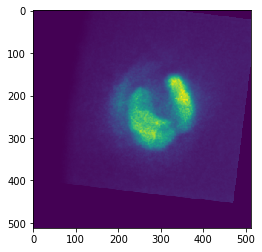

In [40]:
plt.figure
plt.imshow(newX[1,:,:,0])


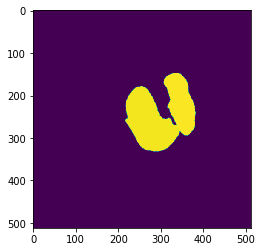

In [41]:
plt.figure
plt.imshow(newY[1,:,:,0])

In [42]:



for i in range(newX.shape[0]):
      resultX = newX[i,:,:,0]
       
     
      base = os.path.split(X[i])[-1]
      
      Filename = "new" + base
      
      save_tiff_imagej_compatible((targetdirX + Filename ) , resultX, axes)
        
for i in range(newY.shape[0]):
      resultY = newY[i,:,:,0]
      base = os.path.split(Y[i])[-1]

      Filename = "new" + base
     
      save_tiff_imagej_compatible((targetdirY + Filename ) , resultY, axes)        

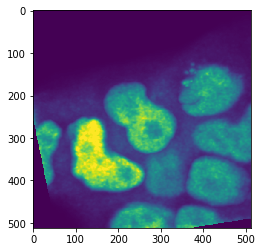

In [43]:
plt.imshow(resultX)

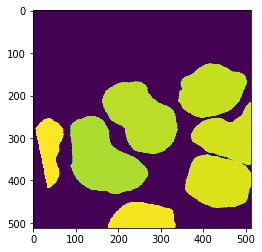

In [44]:
plt.imshow(resultY)